In [2]:
from analysis import * 
from compiler import *

In [4]:
#ram pressure data is stored in HDF5 file
path = '../Justice_League_Code/Data/ram_pressure.hdf5'
with pd.HDFStore(path) as hdf:
    keys = np.array([h[1:] for h in hdf.keys()])
print('Available keys:', *keys)

Available keys: h148_10


In [7]:
#read
key = 'h148_10'
data = pd.read_hdf(path, key=key)

In [8]:
data.head()

,t,a,h1dist,dNN,M_star,M_gas,satRvir,hostRvir,vel_CGM,rho_CGM,...,vel_CGM_adv,rho_CGM_adv,std_vel_CGM,std_rho_CGM,Pram_adv,Prest,SigmaGas,dphidz,SFR,sSFR
0,6.474131,0.537186,364.792761,42.413835,36550604.101680495,758860871.4875889,36.708404,156.773659,186.108095,235.674840,...,43.331665,20610863.510556165,12.341574,105221388.38345541,38699640606.14111,89382429.15710562,414260.1738615778,215.763993,0.005718,1.564285467696553e-10
0,6.905111,0.563402,307.303062,45.147976,37690051.212304726,836199726.3141246,38.666136,164.773772,206.813075,307.971320,...,33.294632,7041.435130218884,8.836240,7634.277090670171,7805659.713641439,94271479.08794996,429711.3099013643,219.383286,0.005266,1.3971772841875997e-10
0,7.039793,0.571574,288.985873,45.396784,37927823.77964406,858441850.2308252,39.302892,167.197539,213.831604,352.820155,...,39.646346,4982.617582152074,21.971169,3265.703954262032,7831841.454429006,111151572.67784983,467107.11937737284,237.957351,0.006096,1.60716799709572e-10
0,7.336092,0.589531,249.239509,44.225085,38527926.95388548,866092795.4820381,41.224906,171.710999,228.577255,515.621896,...,51.794887,5289.5546827005,16.852727,3958.0275818095297,14190343.116950627,218161277.66818348,816556.1198791272,267.172424,0.005727,1.4865113756879744e-10
0,7.767072,0.615628,198.292783,34.288235,47732282.52988313,1324992986.0259008,45.021052,179.248466,243.525238,1150.060200,...,97.512554,3083.1023747812646,31.131701,4322.916943450267,29316290.205378123,187404536.40072763,824888.5255999403,227.187712,0.033281,6.972493875316409e-10


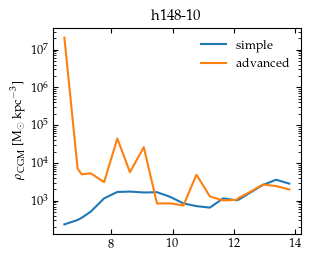

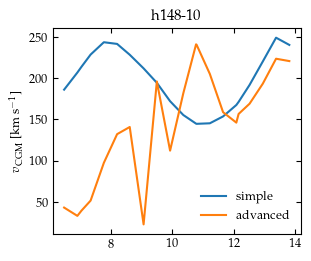

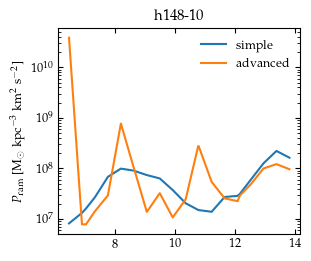

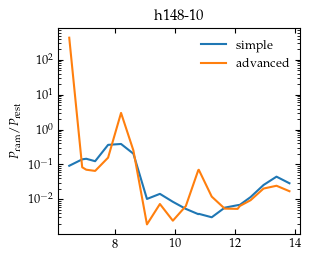

In [9]:
plt.figure(dpi=100, figsize=(3,2.5))
plt.title(key.replace('_','-'))
plt.ylabel(r'$\rho_{\rm CGM}$ [M$_{\odot}~\mathrm{kpc}^{-3}$]')
plt.plot(data.t, data.rho_CGM, label='simple')
plt.plot(data.t, data.rho_CGM_adv, label='advanced')
plt.semilogy()
plt.legend()
plt.show()

plt.figure(dpi=100, figsize=(3,2.5))
plt.title(key.replace('_','-'))
plt.ylabel(r'$v_{\rm CGM}$ [km~s$^{-1}$]')
plt.plot(data.t, data.vel_CGM, label='simple')
plt.plot(data.t, data.vel_CGM_adv, label='advanced')
plt.legend()
plt.show()

plt.figure(dpi=100, figsize=(3,2.5))
plt.title(key.replace('_','-'))
plt.ylabel(r'$P_{\rm ram}$ [M$_{\odot}~\mathrm{kpc}^{-3}~\mathrm{km}^2~\mathrm{s}^{-2}$]')
plt.plot(data.t, data.Pram, label='simple')
plt.plot(data.t, data.Pram_adv, label='advanced')
plt.semilogy()
plt.legend()
plt.show()


plt.figure(dpi=100, figsize=(3,2.5))
plt.title(key.replace('_','-'))
plt.ylabel(r'$P_{\rm ram} / P_{\rm rest}$')
plt.plot(data.t, np.array(data.Pram)/np.array(data.Prest), label='simple')
plt.plot(data.t, np.array(data.Pram_adv)/np.array(data.Prest), label='advanced')
plt.semilogy()
plt.legend()
plt.show()

In [18]:
#rate of expulsion, accretion, ram pressure ratio
#from analysis import *
data_all = read_all_ram_pressure()



FileNotFoundError: ``/home/watanabe/Desktop/Stellar_Feedback_Code/SNeData`` does not exist

In [16]:
def read_all_ram_pressure(suffix=''):
    data_all = pd.DataFrame()
    
    keys = get_keys()
    i = 1
    for key in keys:
        print(i, end=' ')
        i += 1
        sim = key[:4]
        haloid = int(key[5:])
        data = read_ram_pressure(sim, haloid, suffix=suffix)
        data_all = pd.concat([data_all,data])  
    
    return data_all